# Speech Emotion Recognition by using Deep learning

# Package Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display
import seaborn as sns
import librosa
import librosa.display
import soundfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras import optimizers

import warnings

# Dataset Loading

In [2]:
Datasets_Path = Path(r'E:\Ramya\Lead_Projects_New\Speech_emotion_librousa\code\Source Code\Datasets\Crema')
Datasets_Path

WindowsPath('E:/Ramya/Lead_Projects_New/Speech_emotion_librousa/code/Source Code/Datasets/Crema')

In [3]:
filepaths = list(Datasets_Path.glob(r'**/*.wav'))

In [4]:
Emotion_labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filepaths))
Emotion_labels

['ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'ANG',
 'ANG',
 'DIS',
 'DIS',
 'DIS',
 'FEA',
 'FEA',
 'FEA',
 'HAP',
 'HAP',
 'HAP',
 'NEU',
 'SAD',
 'SAD',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'ANG',
 'ANG',
 'DIS',
 'DIS',
 'DIS',
 'FEA',
 'FEA',
 'FEA',
 'HAP',
 'HAP',
 'HAP',
 'NEU',
 'SAD',
 'SAD',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',


In [5]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
Emotion_labels = pd.Series(Emotion_labels, name='Label')
Complete_Speech_datasets = pd.concat([filepaths, Emotion_labels], axis=1)
Complete_Speech_datasets

Filepath Label
0     E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   ANG
1     E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   DIS
2     E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   FEA
3     E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   HAP
4     E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   NEU
...                                                 ...   ...
7437  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   DIS
7438  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   FEA
7439  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   HAP
7440  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   NEU
7441  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   SAD

[7442 rows x 2 columns]

In [6]:
Complete_Speech_datasets.head()

Filepath Label
0  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   ANG
1  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   DIS
2  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   FEA
3  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   HAP
4  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   NEU

In [7]:
Complete_Speech_datasets.tail()

Filepath Label
7437  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   DIS
7438  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   FEA
7439  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   HAP
7440  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   NEU
7441  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   SAD

In [8]:
Complete_Speech_datasets.shape

(7442, 2)

In [9]:
Complete_Speech_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  7442 non-null   object
 1   Label     7442 non-null   object
dtypes: object(2)
memory usage: 116.4+ KB


# Data Visualization

<Axes: xlabel='Label', ylabel='Count'>

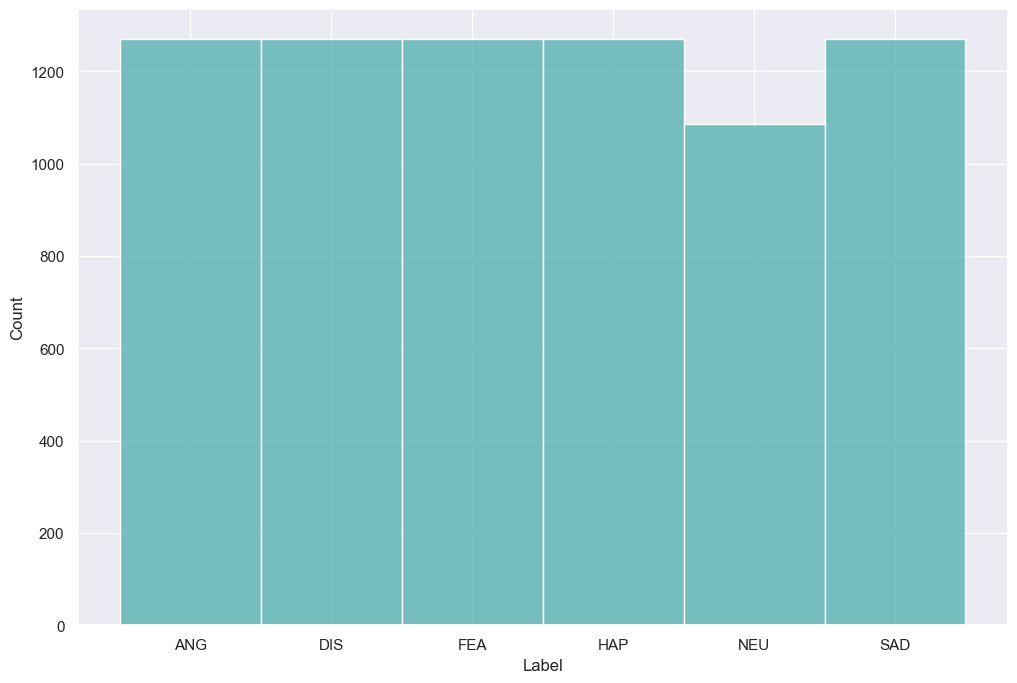

In [10]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('darkgrid')
sns.histplot(Emotion_labels, color='#4FAEB0')

In [11]:
audio_arrays = []

for i in Complete_Speech_datasets['Filepath']:
    x, sr = librosa.load(i, sr=44100)
    audio_arrays.append(x)
    
Complete_Speech_datasets['Arrays'] = audio_arrays

In [12]:
Complete_Speech_datasets

Filepath Label  \
0     E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   ANG   
1     E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   DIS   
2     E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   FEA   
3     E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   HAP   
4     E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   NEU   
...                                                 ...   ...   
7437  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   DIS   
7438  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   FEA   
7439  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   HAP   
7440  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   NEU   
7441  E:\Ramya\Lead_Projects_New\Speech_emotion_libr...   SAD   

                                                 Arrays  
0     [6.9185524e-10, 8.411215e-10, 5.0900356e-10, 4...  
1     [0.00083351025, 0.0011382565, 0.0012377766, 0....  
2     [0.007539533, 0.009629492, 0.008980679, 0.0084...  
3     [-0.0039882455, -0.004723385, -0.0038926, -0.0...  
4     [0.0022234665, 0.002518577, 0.001856927, 0.001...  
...                                                 ...  
7437  [0.0009247182, 0.001315127, 0.0013675159, 0.00...  
7438  [-0.0066004125, -0.008246948, -0.0073625883, -...  
7439  [-0.0020721315, -0.0024467015, -0.0020733473, ...  
7440  [-0.00152146, -0.0017805105, -0.0013755669, -0...  
7441  [0.0007605153, 0.00079003675, 0.0005766324, 0....  

[7442 rows x 3 columns]

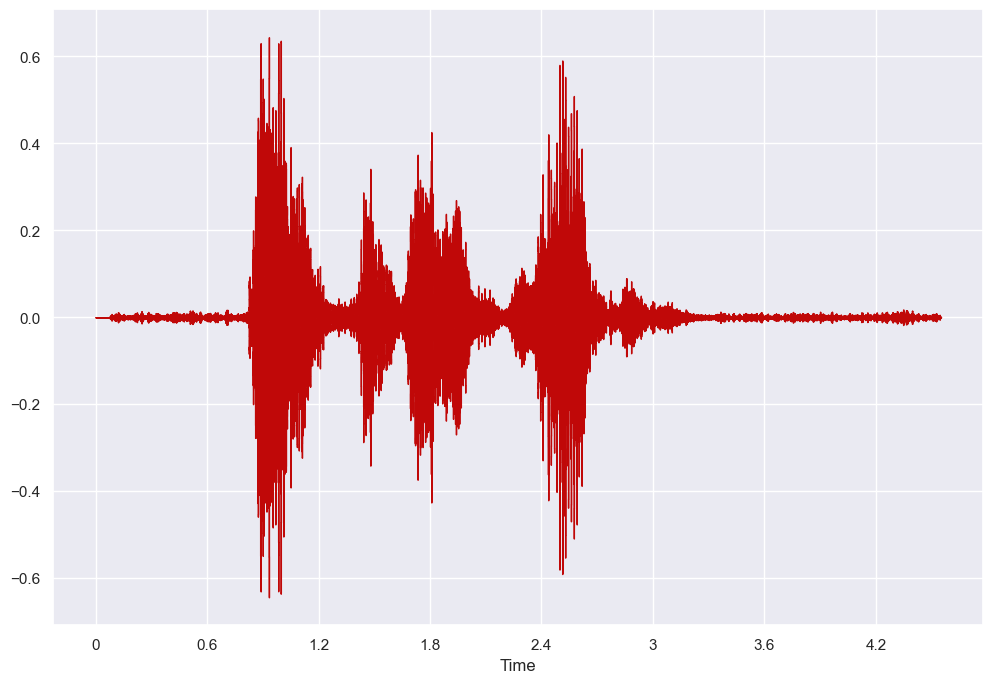

In [13]:
import librosa.display
Angry_file = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'ANG']['Filepath']
Angry_file_array = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'ANG']['Arrays']

librosa.display.waveshow(Angry_file_array.iloc[0], color='#C00808')
IPython.display.Audio(Angry_file.iloc[0])

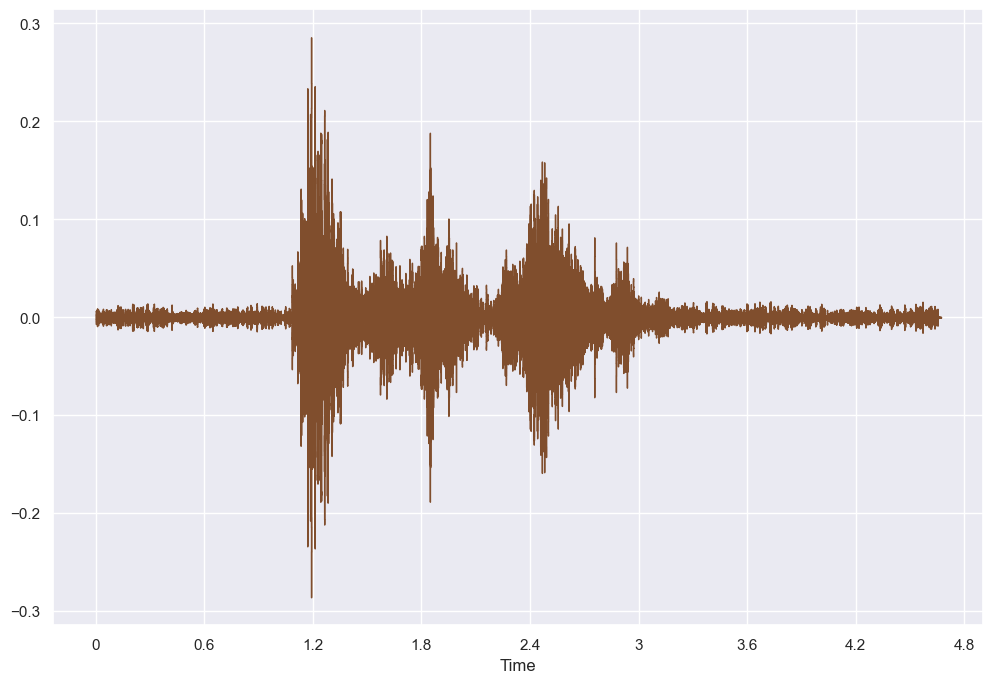

In [14]:
Disgust_file = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'DIS']['Filepath']
Disgust_array = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'DIS']['Arrays']

librosa.display.waveshow(Disgust_array.iloc[0], color='#804E2D')
IPython.display.Audio(Disgust_file.iloc[0])

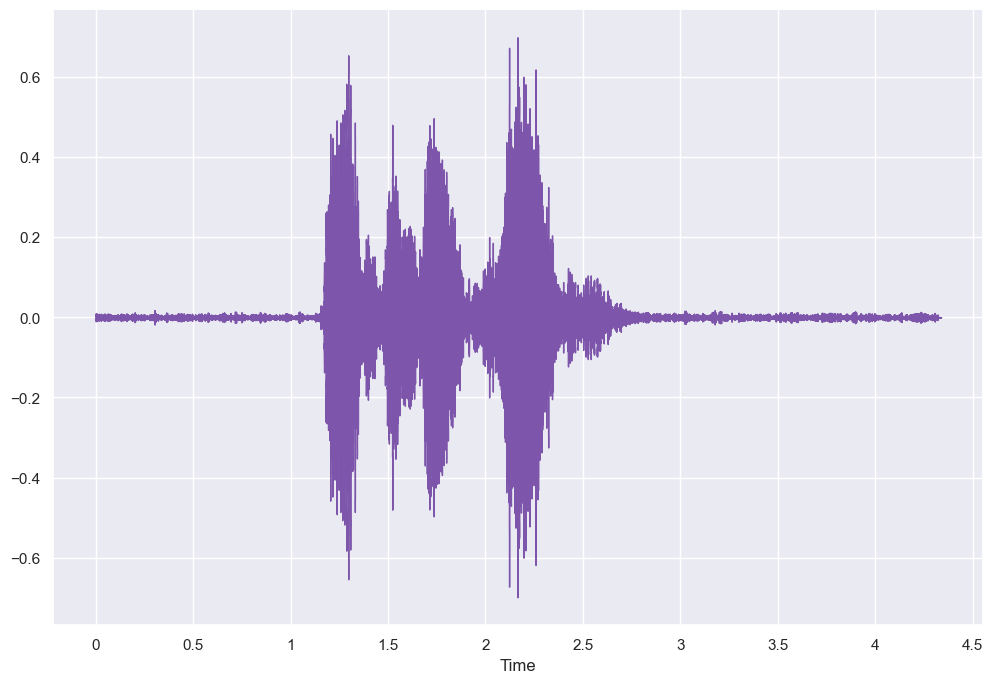

In [15]:
Fear_file = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'FEA']['Filepath']
Fear_Array = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'FEA']['Arrays']

librosa.display.waveshow(Fear_Array.iloc[0], color='#7D55AA')
IPython.display.Audio(Fear_file.iloc[0])

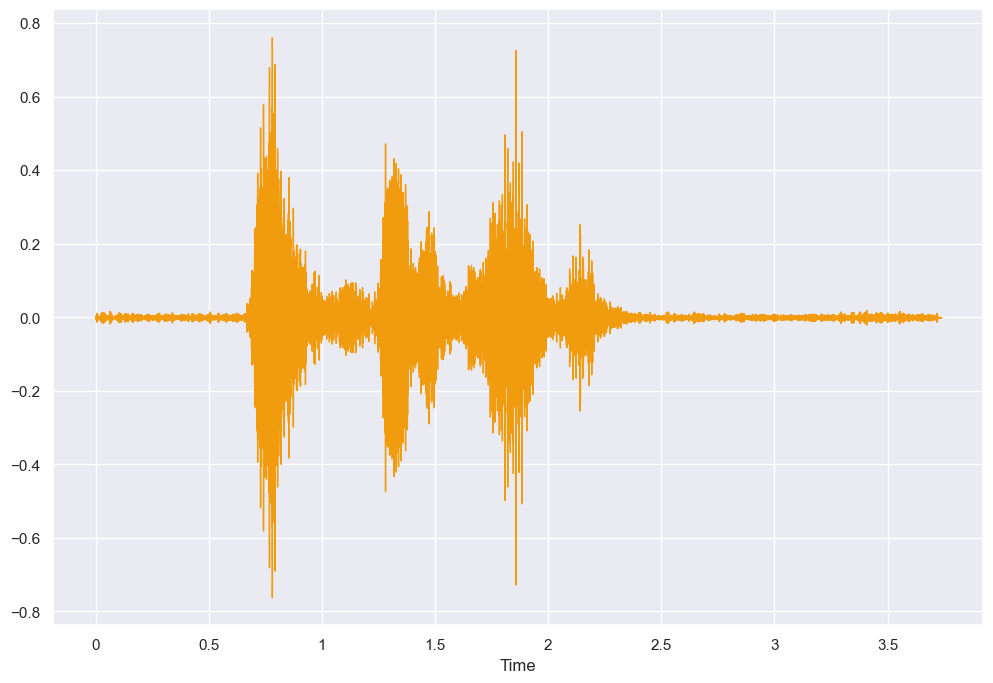

In [16]:
Happy_file = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'HAP']['Filepath']
Happy_array = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'HAP']['Arrays']

librosa.display.waveshow(Happy_array.iloc[0], color='#F19C0E')
IPython.display.Audio(Happy_file.iloc[0])

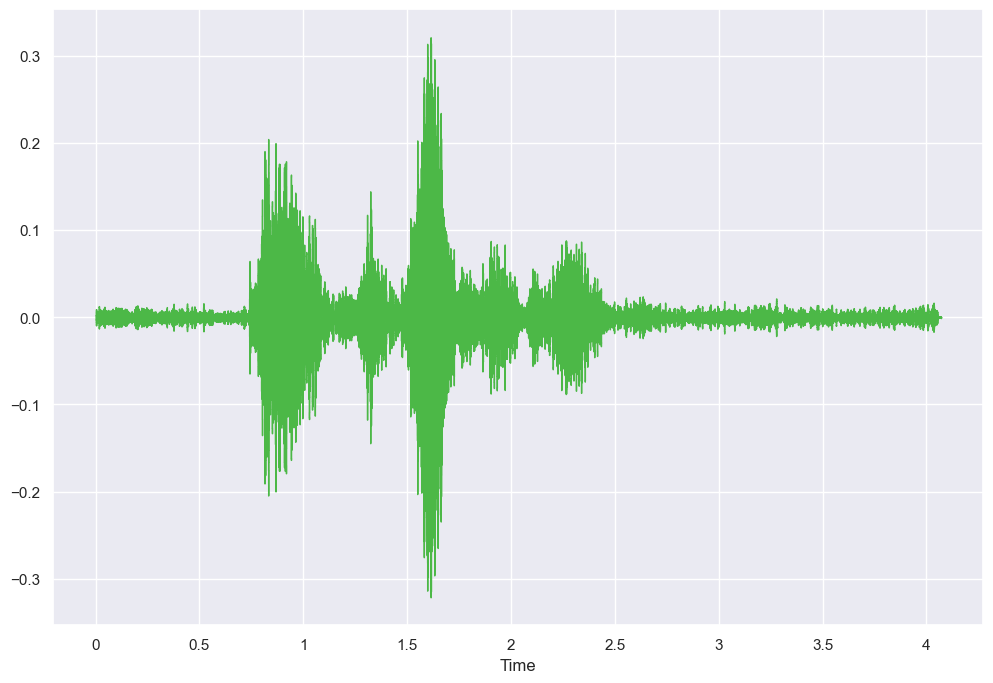

In [17]:
Neutral_file = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'NEU']['Filepath']
Neutral_array = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'NEU']['Arrays']

librosa.display.waveshow(Neutral_array.iloc[0], color='#4CB847')
IPython.display.Audio(Neutral_file.iloc[0])

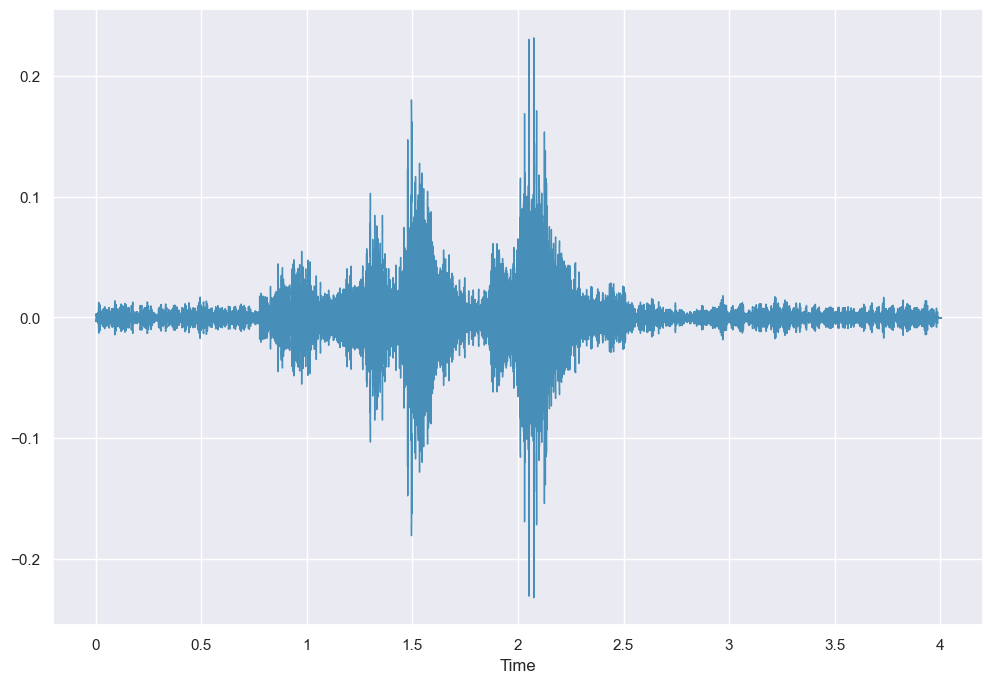

In [18]:
Sad_file = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'SAD']['Filepath']
Sad_array = Complete_Speech_datasets[Complete_Speech_datasets['Label'] == 'SAD']['Arrays']

librosa.display.waveshow(Sad_array.iloc[0], color='#478FB8')
IPython.display.Audio(Sad_file.iloc[0])

# Feature Extraction using Librosa

In [20]:
def extract_features(data):
    # Zero Crossing Rate
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, chroma_stft))     

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mfcc))

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, mel))
    
    # Tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sr).T, axis=0);
    result = np.hstack((result, tonnetz));
    
    return result

In [21]:
def get_features(data):
    result = []
    
    # without augmentation
    res1 = extract_features(data)
    result.append(res1)
    
#     # with noise
#     noise_data = noise(data)
#     res2 = extract_features(noise_data)
#     result.append(res2)
    
#     # with stretching and pitching
#     new_data = stretch(data,rate=0.8)
#     data_stretch_pitch = pitch(new_data, sr)
#     res3 = extract_features(data_stretch_pitch)
#     result.append(res3)
    
    return result

In [22]:
warnings.filterwarnings('ignore')

x = []
y = []
for i in range(len(Complete_Speech_datasets)):
    feature=get_features(Complete_Speech_datasets['Arrays'].iloc[i]);
    for j in feature:
        x.append(j)
        y.append(Complete_Speech_datasets['Label'].iloc[i])

In [23]:
x

[array([ 4.22251745e-02,  7.00323045e-01,  6.85948968e-01,  6.87334299e-01,
         6.88179851e-01,  6.83938742e-01,  6.03143930e-01,  5.79172492e-01,
         6.36593103e-01,  6.80491388e-01,  7.58592784e-01,  8.11837733e-01,
         8.12917471e-01, -7.37245239e+02,  3.36121902e+01, -4.84388924e+01,
         2.16265659e+01,  1.04006100e+01, -1.56531096e+01, -3.30277570e-02,
        -1.11217718e+01, -8.48336029e+00, -6.68181610e+00, -8.83626842e+00,
         1.43051445e+00, -1.10129604e+01, -8.68405151e+00,  2.90608525e+00,
        -1.13607283e+01, -7.34537697e+00, -9.67418075e-01, -8.79806137e+00,
        -3.59628320e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.15209199e-01,
         1.45333745e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.08767340e-01,  6.02745302e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0

In [24]:
y

['ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'ANG',
 'ANG',
 'DIS',
 'DIS',
 'DIS',
 'FEA',
 'FEA',
 'FEA',
 'HAP',
 'HAP',
 'HAP',
 'NEU',
 'SAD',
 'SAD',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'ANG',
 'ANG',
 'DIS',
 'DIS',
 'DIS',
 'FEA',
 'FEA',
 'FEA',
 'HAP',
 'HAP',
 'HAP',
 'NEU',
 'SAD',
 'SAD',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',
 'HAP',
 'NEU',
 'SAD',
 'ANG',
 'DIS',
 'FEA',


In [25]:
le = LabelEncoder()
y = utils.to_categorical(le.fit_transform(y))
y

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

# Model Implementation : CNN Algorithm

In [27]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(np.array(x), np.array(y), test_size=0.1)

In [28]:
print(Train_X.shape)

(6697, 167)


In [29]:
print(Test_X.shape)

(745, 167)


In [30]:
print(Train_Y.shape)

(6697, 6)


In [31]:
print(Test_Y.shape)

(745, 6)


In [35]:
Train_X = np.expand_dims(Train_X,axis=3)
Test_X = np.expand_dims(Test_X,axis=3)

In [36]:
print((Train_X.shape, Train_Y.shape, Test_X.shape, Test_Y.shape))

((6697, 167, 1, 1), (6697, 6), (745, 167, 1, 1), (745, 6))


In [38]:
model = Sequential()
model.add(Conv1D(128, 3, activation='relu', input_shape=(Train_X.shape[1], 1)))
model.add(MaxPooling1D((1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(512, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Conv1D(1024, 3, activation='relu'))
model.add(MaxPooling1D((1)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.0005),
             metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 165, 128)          512       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 165, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 163, 256)          98560     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 163, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 161, 512)          393728    
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 161, 512)         

In [40]:
history = model.fit(Train_X, Train_Y,
                    epochs=7,
                    batch_size=128,
                    validation_data=(Test_X, Test_Y))

Epoch 1/7
53/53 [==============================] - 616s 12s/step - loss: 1.4543 - accuracy: 0.4014 - val_loss: 1.3846 - val_accuracy: 0.4282
Epoch 2/7
53/53 [==============================] - 472s 9s/step - loss: 1.4295 - accuracy: 0.4044 - val_loss: 1.4207 - val_accuracy: 0.4242
Epoch 3/7
53/53 [==============================] - 642s 12s/step - loss: 1.4342 - accuracy: 0.4048 - val_loss: 1.4094 - val_accuracy: 0.4295
Epoch 4/7
53/53 [==============================] - 439s 8s/step - loss: 1.4235 - accuracy: 0.4136 - val_loss: 1.4665 - val_accuracy: 0.3718
Epoch 5/7
53/53 [==============================] - 430s 8s/step - loss: 1.4143 - accuracy: 0.4111 - val_loss: 1.3968 - val_accuracy: 0.4215
Epoch 6/7
53/53 [==============================] - 575s 11s/step - loss: 1.4159 - accuracy: 0.4220 - val_loss: 1.3925 - val_accuracy: 0.4416
Epoch 7/7
53/53 [==============================] - 557s 10s/step - loss: 1.4050 - accuracy: 0.4229 - val_loss: 1.5236 - val_accuracy: 0.4027


In [45]:
model.save("modelfile.h5")

In [42]:
Final_prediction = model.predict(Test_X)

24/24 [==============================] - 8s 316ms/step


# Classification Report 

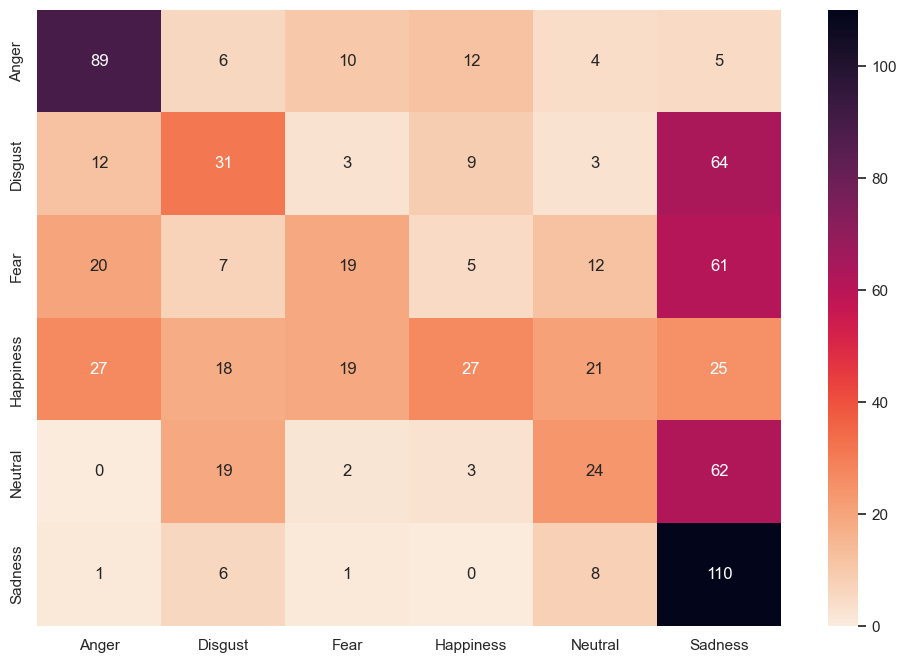

In [43]:
CM_Report = confusion_matrix(Test_Y.argmax(axis=1), Final_prediction.argmax(axis=1))
ax = sns.heatmap(CM_Report, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])

In [47]:
from sklearn.metrics import classification_report
print('Classification Report')
print(classification_report(Test_Y.argmax(axis=1), Final_prediction.argmax(axis=1)))

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.71      0.65       126
           1       0.36      0.25      0.30       122
           2       0.35      0.15      0.21       124
           3       0.48      0.20      0.28       137
           4       0.33      0.22      0.26       110
           5       0.34      0.87      0.49       126

    accuracy                           0.40       745
   macro avg       0.41      0.40      0.36       745
weighted avg       0.41      0.40      0.37       745



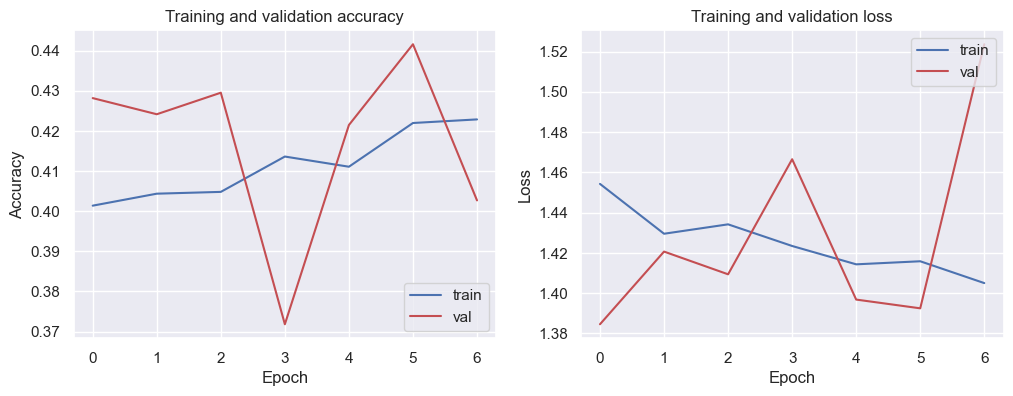

In [48]:
Train_accuracy = history.history['accuracy']
Val_accuracy = history.history['val_accuracy']
Train_loss = history.history['loss']
Val_loss = history.history['val_loss']

epochs = range(len(Train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, Train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, Val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, Train_loss, 'b', label='Training loss')
plt.plot(epochs, Val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

plt.show()